In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [55]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
                'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
                'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
                'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
                'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
                'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter',
                'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity',
                'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = pd.read_csv(url, header=None, names=column_names)
df

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 2:]
y = df.iloc[:, 1]

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
# Here, not cross-validations is performed, only a single pipeline.
# The estimator should be the last argument in make_pipeline()

pipe_lr = make_pipeline(StandardScaler(),
                        LinearDiscriminantAnalysis(n_components=1), # n_components must be <= min(n_features, n_classes-1)
                        LogisticRegression(penalty='l2', max_iter=10000, n_jobs=-1),
                        )

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
accuracy = pipe_lr.score(X_test, y_test)
accuracy

0.9473684210526315

In [61]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=-1)

In [62]:
train_scores
# rows: number of train samples
# columns: number of folds (cv)

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.98765432, 0.98765432, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.98360656, 0.99180328, 0.98360656, 0.98360656, 0.98360656,
        0.98360656, 0.98360656, 0.98360656, 0.98360656, 0.98360656],
       [0.96932515, 0.98159509, 0.98159509, 0.98159509, 0.97546012,
        0.97546012, 0.97546012, 0.97546012, 0.97546012, 0.97546012],
       [0.98529412, 0.9754902 , 0.98529412, 0.99019608, 0.98039216,
        0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216],
       [0.9877551 , 0.97959184, 0.98367347, 0.99183673, 0.9755102 ,
        0.97959184, 0.97959184, 0.97959184, 0.97959184, 0.97959184],
       [0.98251748, 0.98251748, 0.98251748, 0.98601399, 0.97902098,
        0.97552448, 0.97902098, 0.98251748, 0.98251748, 0.98251748],
       [0.98470948, 0.98776758, 0.9816513

In [63]:
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores,  axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores,  axis=1)

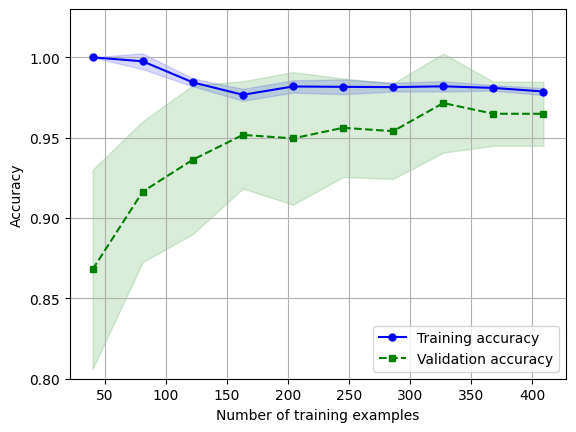

In [64]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation (test) accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')


plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

In [75]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv=10,
                                             )

In [76]:
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores,  axis=1)
test_mean  = np.mean(test_scores,  axis=1)
test_std   = np.std(test_scores,   axis=1)

In [78]:
train_scores

array([[0.85085575, 0.84596577, 0.84107579, 0.8606357 , 0.85330073,
        0.84390244, 0.84390244, 0.83658537, 0.84390244, 0.84634146],
       [0.9608802 , 0.95843521, 0.9608802 , 0.96821516, 0.9608802 ,
        0.95609756, 0.95609756, 0.96097561, 0.95853659, 0.96341463],
       [0.97310513, 0.97310513, 0.97555012, 0.97799511, 0.97310513,
        0.96829268, 0.97317073, 0.97073171, 0.97317073, 0.97317073],
       [0.9804401 , 0.98288509, 0.97555012, 0.97799511, 0.97555012,
        0.97804878, 0.97804878, 0.97804878, 0.9804878 , 0.9804878 ],
       [0.98288509, 0.98288509, 0.97799511, 0.98777506, 0.97799511,
        0.97560976, 0.98292683, 0.97804878, 0.98292683, 0.98536585],
       [0.98288509, 0.98777506, 0.97799511, 0.99022005, 0.98288509,
        0.97804878, 0.98292683, 0.97560976, 0.98292683, 0.98780488]])

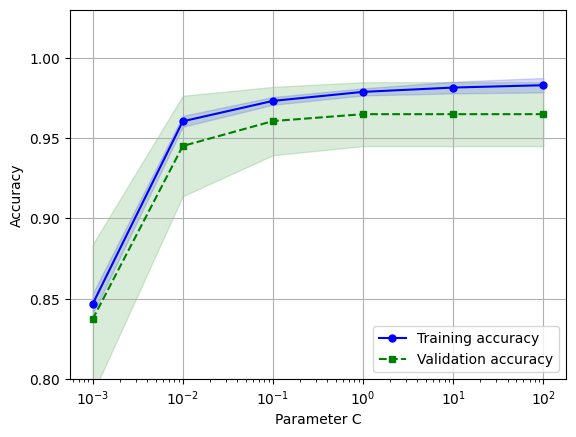

In [77]:
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
# the key difference between learning and validation curves is that the learning curve analyzes model performance with respect to training data size, while the validation curve analyzes model performance with respect to hyperparameters tunning of the estimator/transformer.